# Multivariate Theory of Functional Connections
This tutorial is based on the theory from and notation found in [The Multivariate Theory of Functional Connections: Theory, Proofs, and Application in Partial Differential Equations](https://www.mdpi.com/2227-7390/8/8/1303). This journal article is open access and therefore free to download, and the interested user is encouraged to refer to it where necessary to solidify their understanding of TFC.

In addition, just as the mathematical theory behind the multivariate TFC builds upon the univariate TFC, the multivarite TFC class builds upon the univariate TFC class. Therefore, if the reader is not familiar with the univariate TFC class, they are strongly encouraged to familiarize themselves via the [univariate TFC tutorial](UnivariateTFC.ipynb).

## Creating the multivariate class
This tutorial is designed to familiarize the user with the multivariat TFC class. To begin, let's import it.

In [1]:
from tfc import mtfc

The multivariate TFC class has the same required and optional inputs as the univariate TFC class with two exceptions: (1) the multivariate TFC class has an optional keyword argument $dim$ that controls the dimensionality of the basis functions, e.g., $dim=3$ for three dimensional basis functions (2) the multivariate TFC class does not have the ELMReLU basis function option. Of course, the required positional arguments must be specified in multivariate form. To elaborate, let's consider an example.

Supposes we wanted to create a multivariate TFC class for a three dimensional problem that uses the Chebyshev orthogonal polynomials. Furthermore, we want to discretize the domain via a grid that is $10\times8\times3$ (240 total points) on the domain $[0,1]\times[2,\pi]\times[1,3]$. In addition, we want to remove the first two basis functions from the first dimension, the first basis function from the second dimension, and the first and third basis functions from the third dimension. Also, we want to create the basis function expansion up to degree 5. 

Number of points: 240
Basis function removal matrix: 
[[ 0  1]
 [ 0 -1]
 [ 0  2]]


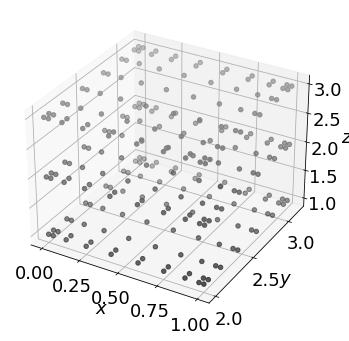

In [2]:
import jax.numpy as np # Imported so we can access pi
from tfc.utils import MakePlot # Imported so we can plot the points at the end

# This line is added for Python notebooks but is not necessary in a regular Python script.
%matplotlib inline 

N = [10,8,3] # Number of points per dimension
nC = [2,1,[0,2]] # Basis functions to remove per dimension
m = 5 # Degree of basis function expansion
x0 = [0.,2.,1.] # Start of the domain for each dimension
xf = [1.,np.pi,3.] # End of the domain for each dimension

myTfc = mtfc(N,nC,m,dim=3,x0=x0,xf=xf)
x = myTfc.x

# Print out satistics
print("Number of points: "+str(myTfc.x[0].shape[0]))
print("Basis function removal matrix: \n"+str(myTfc.nC))

# Show points
p = MakePlot(r'$x$',r'$y$',zlabs=r'$z$')
p.ax[0].scatter(*x,color=[str(val/6.) for val in x[2]])
p.PartScreen(5,5)
p.show()

As you can see, the total number of points, number of points per dimension, and domain of the points matches our specifications. Moreover, the points are arranged using Chebyshev-Gauss-Lobatto nodes, an optimal discretization scheme for Chebyshev orthogonal polynomials, see [The Multivariate Theory of Functional Connections: Theory, Proofs, and Application in Partial Differential Equations](https://www.mdpi.com/2227-7390/8/8/1303).

The basis function removal matrix matches our expectation as well:

* In the first dimension basis functions 0 and 1 are removed. Thus, the first two basis functions are removed as specified.
* In the second dimension basis function 0 is removed, and the -1 indicates that no more basis functions are to be removed. Thus, only the first basis function is removed as specified. 
* In the third dimension basis function 0 and 2 are removed. Thus, the first and third basis functions are removed as specified.

## Using the basis functions
The main purpose of the multivariate TFC class is to provide a way to easily create and take derivatives of the linear combinations of functions that form the free function. These are easily accessed using via the H method. 

In [3]:
H = myTfc.H
print(H(*x))

[[ 1. -1.  1. ... -1. -1. -1.]
 [ 1. -1.  1. ... -1. -1.  0.]
 [ 1. -1.  1. ... -1. -1.  1.]
 ...
 [ 1.  1.  1. ...  1.  1. -1.]
 [ 1.  1.  1. ...  1.  1.  0.]
 [ 1.  1.  1. ...  1.  1.  1.]]


Notice that in the multivarite case, H must be called using ```*x``` rathern than ```x```, because in the multivariate case ```myTfc.x``` is a tuple, where the array in each element corresponds to the coordinate values of the points in the associated dimension, e.g., the points for the second independent variable are located in ```x[1]```.

Similar to the univariate TFC class, the multivariate TFC class provides direct access to derivatives of ```H```, via methods such as ```Hx```. The full list of direct access derivatives is ```H```, ```Hx```, ```Hy```, ```Hxy```, ```Hx2```, ```Hy2```, ```Hx2y```, ```Hxy2```, and ```Hz```. Here, x, y, and z stand for the first, second, and third derivatives respectively, and the number 2 stands for a second order derivative. For example: 

$$ \text{Hxy2}= \frac{\partial ^3 H}{\partial x \partial y^2}.$$

Furthermore, the functions ```H``` and the derivative variants are all encoded as JAX primitives. Therefore, one can take derivatives of them using the JAX transformations or even run them via the JIT compiler.

In [4]:
from jax import jit
from tfc.utils import egrad
Hy = myTfc.Hy
Hyjax = jit(egrad(H,1))
assert(np.all(Hy(*x)==Hyjax(*x)))

The user is encouraged to consult the [JAX GitHub](https://github.com/google/jax) and the [JAX documentation](https://jax.readthedocs.io/en/latest/) for more information on the JAX package.